# Importing necessary files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.decomposition import PCA
%matplotlib inline

# Data Preprocessing

## Importing the Data file

Data is in the form of csv format, that is comma separated file.

In [129]:
data = pd.read_csv('data_payment behavior.csv')

In [130]:
df = data

In [131]:
data.head() #head function gives us the first 5 rows of the dataframe

,Type,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Lineitem requires shipping,Lineitem taxable,Payment Method,Source,Presentment Currency,Payment Attempts,Shipping and IP Location Match,Billing Country and Shipping Country Match,Web Proxy
0,1,no,USD,329.0,0.0,0.0,329.0,True,False,PayPal Express Checkout,web,USD,5,no,yes,No
1,1,no,USD,329.0,0.0,0.0,329.0,True,False,2Checkout,web,USD,3,no,yes,No
2,1,no,USD,329.0,0.0,0.0,329.0,True,False,PayPal Express Checkout,web,USD,2,no,yes,No
3,1,no,USD,159.0,0.0,0.0,159.0,True,False,PayPal Express Checkout,web,USD,5,yes,yes,No
4,1,no,USD,329.0,0.0,0.0,329.0,True,False,PayPal Express Checkout,web,USD,6,yes,yes,No


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 16 columns):
Type                                          4579 non-null int64
Accepts Marketing                             4180 non-null object
Currency                                      4179 non-null object
Subtotal                                      4179 non-null float64
Shipping                                      4179 non-null float64
Taxes                                         4179 non-null float64
Total                                         4179 non-null float64
Lineitem requires shipping                    4579 non-null bool
Lineitem taxable                              4579 non-null bool
Payment Method                                4179 non-null object
Source                                        4182 non-null object
Presentment Currency                          4179 non-null object
Payment Attempts                              4579 non-null int64
Shipping and IP Location

## Checking for NULL values i.e. total number of missing values

In [133]:
data.isnull().sum()

Type                                            0
Accepts Marketing                             399
Currency                                      400
Subtotal                                      400
Shipping                                      400
Taxes                                         400
Total                                         400
Lineitem requires shipping                      0
Lineitem taxable                                0
Payment Method                                400
Source                                        397
Presentment Currency                          400
Payment Attempts                                0
Shipping and IP Location Match                  0
Billing Country and Shipping Country Match      0
Web Proxy                                       0
dtype: int64

## Droping NULL or missing value containg rows

In [134]:
data = data.dropna(axis=0, subset=['Type']) #it drops the rows containing null values with respect to Class column

## Droping the unnecessary columns which are useless for model

In [135]:
data = data.drop(['Currency', 'Shipping', 'Taxes', 'Total', 'Lineitem requires shipping', 'Presentment Currency'], axis=1)
# these columns are not required for the model, as they will cause overfitting of data.

In [136]:
data = data.dropna() #dropping rows containg null values

## Checking for missing values. Now, there is no missing value

In [137]:
data.isnull().sum()

Type                                          0
Accepts Marketing                             0
Subtotal                                      0
Lineitem taxable                              0
Payment Method                                0
Source                                        0
Payment Attempts                              0
Shipping and IP Location Match                0
Billing Country and Shipping Country Match    0
Web Proxy                                     0
dtype: int64

In [138]:
data.head()

,Type,Accepts Marketing,Subtotal,Lineitem taxable,Payment Method,Source,Payment Attempts,Shipping and IP Location Match,Billing Country and Shipping Country Match,Web Proxy
0,1,no,329.0,False,PayPal Express Checkout,web,5,no,yes,No
1,1,no,329.0,False,2Checkout,web,3,no,yes,No
2,1,no,329.0,False,PayPal Express Checkout,web,2,no,yes,No
3,1,no,159.0,False,PayPal Express Checkout,web,5,yes,yes,No
4,1,no,329.0,False,PayPal Express Checkout,web,6,yes,yes,No


## Feature Engineering: Converting Categorical Variables Into Dummy Variables

In [139]:
accepts_marketing = pd.get_dummies(data['Accepts Marketing'])
#lineitem_requires_shipping = pd.get_dummies(data['Lineitem requires shipping'])
lineitem_taxable = pd.get_dummies(data['Lineitem taxable'])
payment_method = pd.get_dummies(data['Payment Method'])
source = pd.get_dummies(data['Source'])
S_ip_l_match = pd.get_dummies(data['Shipping and IP Location Match'])
billing_country_shipping = pd.get_dummies(data['Billing Country and Shipping Country Match'])
web_proxy = pd.get_dummies(data['Web Proxy'])

In [140]:
data['Accepts Marketing'] = accepts_marketing['yes']
#data['Lineitem requires shipping'] = lineitem_requires_shipping
data['Lineitem taxable'] = lineitem_taxable[True]
data['Payment Method'] = payment_method['PayPal Express Checkout']
data['Source'] = source['web']
data['Shipping and IP Location Match'] = S_ip_l_match['yes']
data['Billing Country and Shipping Country Match'] = billing_country_shipping['yes']
data['Web Proxy'] = web_proxy['Yes']

In [141]:
#data = data.drop(['Billing Country'], axis=1)

In [142]:
#data = data.join(billing_country)

In [143]:
data.head()

,Type,Accepts Marketing,Subtotal,Lineitem taxable,Payment Method,Source,Payment Attempts,Shipping and IP Location Match,Billing Country and Shipping Country Match,Web Proxy
0,1,0,329.0,0,1,1,5,0,1,0
1,1,0,329.0,0,0,1,3,0,1,0
2,1,0,329.0,0,1,1,2,0,1,0
3,1,0,159.0,0,1,1,5,1,1,0
4,1,0,329.0,0,1,1,6,1,1,0


## Converting Data into dependent and independent variables

In [144]:
X = data.drop(['Type'], axis=1)

In [145]:
X.head()

,Accepts Marketing,Subtotal,Lineitem taxable,Payment Method,Source,Payment Attempts,Shipping and IP Location Match,Billing Country and Shipping Country Match,Web Proxy
0,0,329.0,0,1,1,5,0,1,0
1,0,329.0,0,0,1,3,0,1,0
2,0,329.0,0,1,1,2,0,1,0
3,0,159.0,0,1,1,5,1,1,0
4,0,329.0,0,1,1,6,1,1,0


In [146]:
y = data['Type']

In [147]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

# Feature importance: Taking out most important features using Decision Tree Classifier

In this we are taking out most important features using decision tree classifier

Feature ranking:
1. feature 5 (0.796122)
2. feature 4 (0.121583)
3. feature 1 (0.063114)
4. feature 6 (0.019181)
5. feature 8 (0.000000)
6. feature 7 (0.000000)
7. feature 3 (0.000000)
8. feature 2 (0.000000)
9. feature 0 (0.000000)


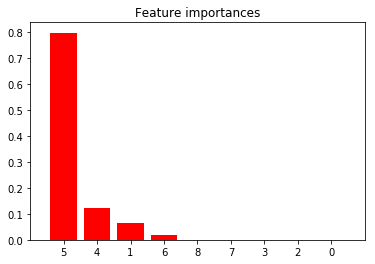

In [148]:
# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

As you can see from the above graph that Most Important Features are:

In [149]:
imp_cols_indices = indices

In [150]:
X.columns

Index(['Accepts Marketing', 'Subtotal', 'Lineitem taxable', 'Payment Method',
       'Source', 'Payment Attempts', 'Shipping and IP Location Match',
       'Billing Country and Shipping Country Match', 'Web Proxy'],
      dtype='object')

In [151]:
imp_cols = X.columns[imp_cols_indices][:4]

In [152]:
imp_cols

Index(['Payment Attempts', 'Source', 'Subtotal',
       'Shipping and IP Location Match'],
      dtype='object')

In [153]:
X = X[imp_cols]

## Visualisation

Visualizing the various features of data.

### Correlation matrix

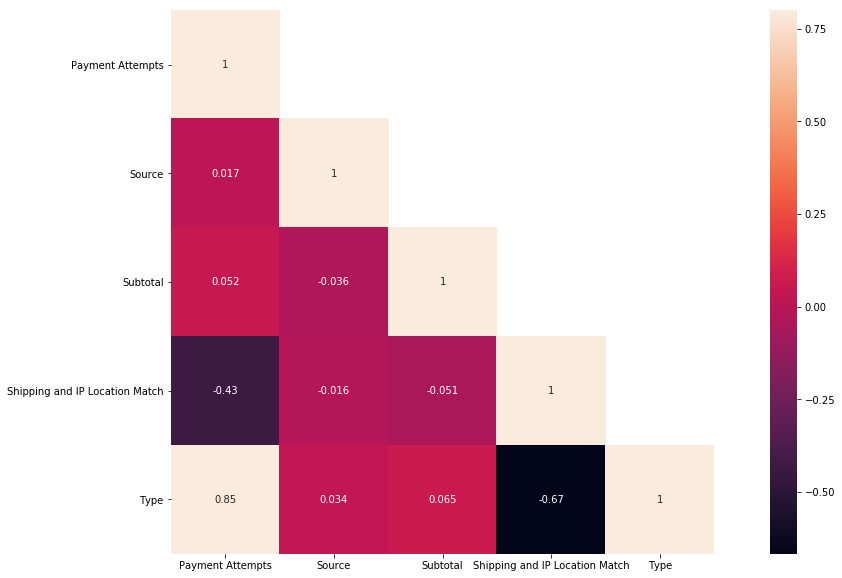

In [154]:
corrMatt = X.join(y).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

### Histograms

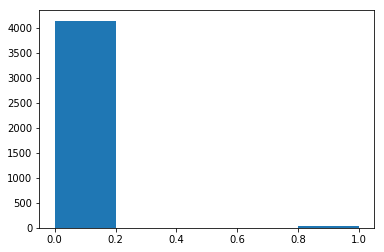

In [155]:
plt.hist((y),bins=5)
plt.show()

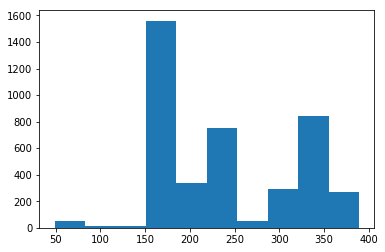

In [156]:
plt.hist(data.Subtotal,bins=10)
plt.show()

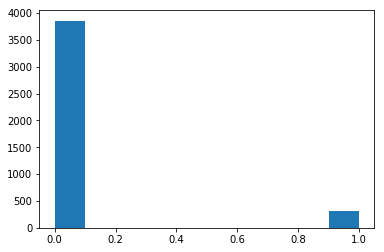

In [157]:
plt.hist(data['Lineitem taxable'],bins=10)
plt.show()

### Countplot

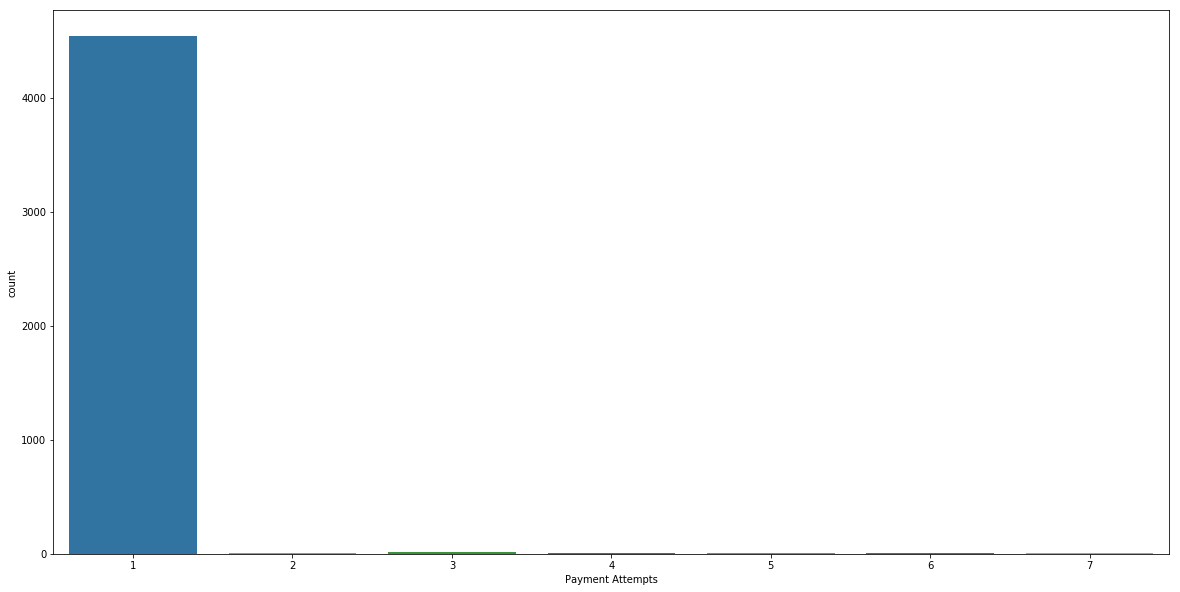

In [158]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.countplot(df['Payment Attempts'],label="Count")
plt.show()

From this count plot, we can conclude that there are many users who attempted only once.

# Supervised Learning

## Splitting the data into train and test.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Using Logistic Regression, Support Vector Machines and Random Forest Classifiers.

Logistic Regression, SVM and Random Forest classifiers are used for training the model. As this is a classification problem, we have to use classification algorithms.

In [160]:
#for i in range(1,5):
    #print("No. of Components", i)
    # Applying PCA
    #pca=PCA(n_components=i)
    #x_train = pca.fit_transform(X_train)
    #x_test = pca.transform(X_test)
    #explained_variance = pca.explained_variance_ratio_
    #print("CoVariance:", sum(explained_variance)*100)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
print("Logistic Regressor Accuracy Score:", regressor.score(X_test, y_test)*100)

regressor = ensemble.RandomForestClassifier(n_estimators=100)
regressor.fit(X_train, y_train)
print("Random Forest Accuracy Score:", regressor.score(X_test, y_test)*100)

regressor = SVC(kernel='linear',random_state=0)
regressor.fit(X_train, y_train)
print("SVC Accuracy Score:", regressor.score(X_test, y_test)*100)
print("\n")

Logistic Regressor Accuracy Score: 99.90430622009569
Random Forest Accuracy Score: 100.0
SVC Accuracy Score: 100.0




# Validation

Values predicted by the model are stored for evaluation.

In [161]:
predicted = regressor.predict(X_test) # predicted values

## Confusion Matrix

In [169]:
print(metrics.confusion_matrix(y_test, predicted))

[[1032    0]
 [   0   13]]


## Classification Report

In [170]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1032
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00      1045



# END!